In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data_Transport_Model = pd.read_excel('../../Dataset/processed_data/DataTransportEmissions.xlsx')
data_Transport_Model.head()

,Year,Country,Domestic_Aviation,Road_Transportation,Railways,Transport_Emissions
0,2005,Belgium,17.66090,25515.57286,128.98981,26347.49235
1,1995,Belgium,14.66402,21732.87158,187.84163,22519.48015
2,2010,Belgium,17.91315,25341.01250,104.13798,26168.14528
3,2015,Belgium,13.90226,25741.68524,65.53624,26404.07750
4,1990,Belgium,14.68866,19728.85467,222.44965,20553.75883


In [10]:
data_Transport_Model.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 406 entries, 0 to 405
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Year                 406 non-null    int64  
 1   Country              406 non-null    object 
 2   Domestic_Aviation    406 non-null    float64
 3   Road_Transportation  406 non-null    float64
 4   Railways             406 non-null    float64
 5   Transport_Emissions  406 non-null    float64
dtypes: float64(4), int64(1), object(1)
memory usage: 19.2+ KB


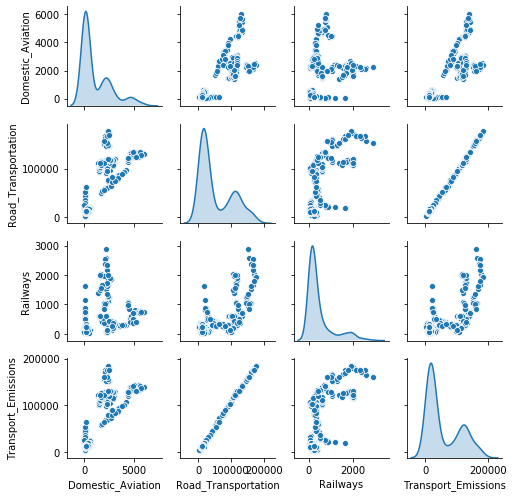

In [5]:
sns_plot = sns.pairplot(data = data_Transport_Model.drop(columns = 'Year'), diag_kind = 'kde', height = 1.7)
sns_plot.savefig("Pairplot of subfeatures of Transport Emission.pdf")

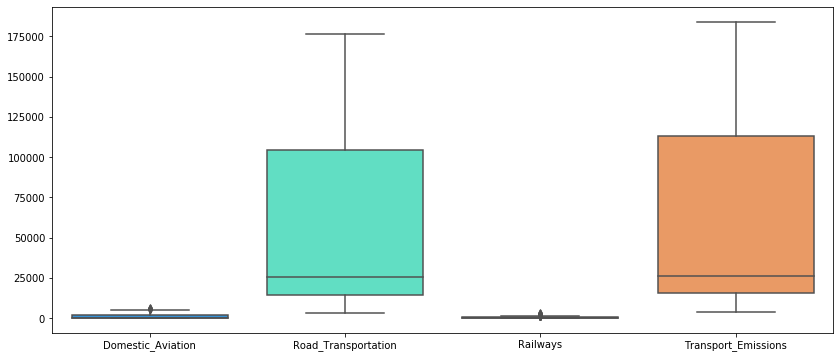

In [15]:
# Box Plot of features to understand the range of data.
# %matplotlib inline
# from pylab import rcParams
# rcParams['figure.figsize'] = 8, 8
# plot = sns.boxplot(data=data_Transport_Model.drop(columns= ['Transport_Emissions','Year']))
df = data_Transport_Model.drop(columns=['Year'])
plt.figure(figsize=(14, 6))
sns.boxplot(data=df, palette='rainbow')
plt.savefig('plots/TransportModel/Boxplot_of_Transport-Model.pdf')

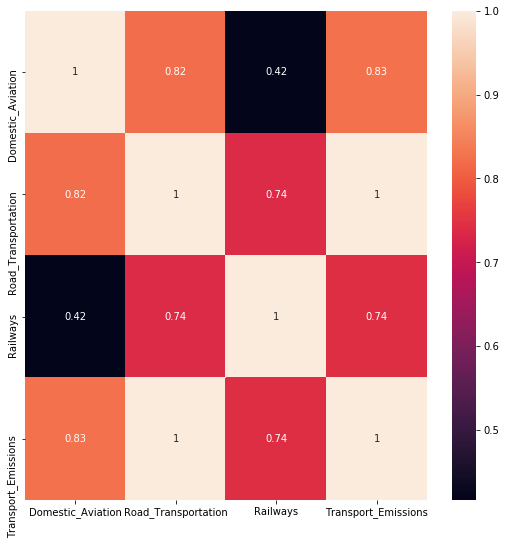

In [77]:
# Correlation of sub features with Transport Emissions.
%matplotlib inline
from pylab import rcParams
rcParams['figure.figsize'] = 9,9
corL = data_Transport_Model.drop(columns = 'Year').corr()
fig = plt.figure()
sns.heatmap(corL, annot=True)

fig.savefig("Correlation.pdf")


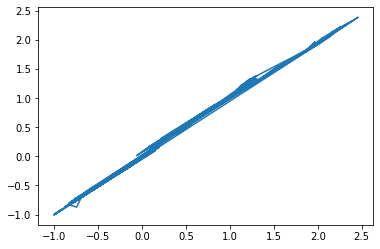

In [20]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
col_names = list(data_Transport_Model.columns)
col_names.remove('Country')
# print(col_names)
dataTransportScaled = pd.DataFrame(scaler.fit_transform(data_Transport_Model.drop(columns = 'Country')),columns=col_names)
plt.plot(dataTransportScaled['Road_Transportation'],dataTransportScaled['Transport_Emissions'])
plt.show()

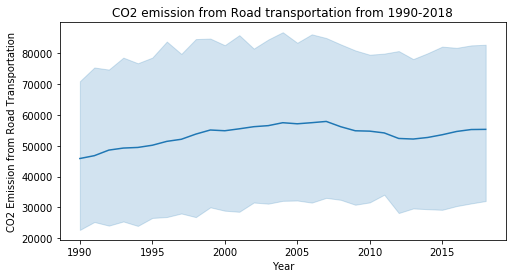

In [50]:
#Road Transportation change with time
%matplotlib inline
from pylab import rcParams
rcParams['figure.figsize'] = 8, 4

fig = plt.figure()
ax = sns.lineplot(x = "Year", y = "Road_Transportation", data = data_Transport_Model)
ax.set(ylabel = 'CO2 Emission from Road Transportation', xlabel = 'Year', title = 'CO2 emission from Road transportation from 1990-2018')

fig.savefig("Roadtransportation with time.pdf")


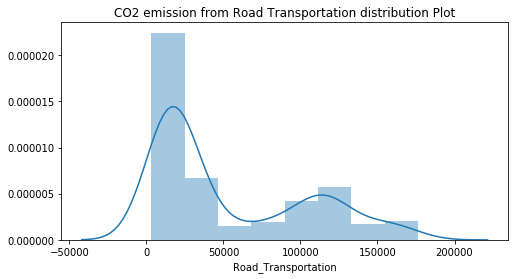

In [51]:
# Road Transportation distribution
%matplotlib inline
from pylab import rcParams
rcParams['figure.figsize'] = 8, 4
fig = plt.figure()

ax = sns.distplot(data_Transport_Model["Road_Transportation"])
ax.set(title = 'CO2 emission from Road Transportation distribution Plot')
fig.savefig("Road_Transportation Distribution.pdf")

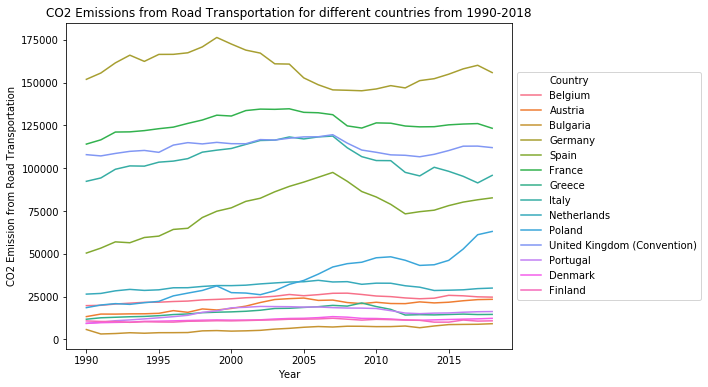

In [97]:
# Road_Transportation for different countries

%matplotlib inline
from pylab import rcParams
rcParams['figure.figsize'] = 10, 6

fig = plt.figure()

ax = sns.lineplot(x = 'Year', y = 'Road_Transportation', hue='Country', data = data_Transport_Model)

ax.set(xlabel = 'Year', ylabel = 'CO2 Emission from Road Transportation', title = 'CO2 Emissions from Road Transportation for different countries from 1990-2018')
box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))

fig.savefig("Road_Transportation with Time for All countries.pdf")

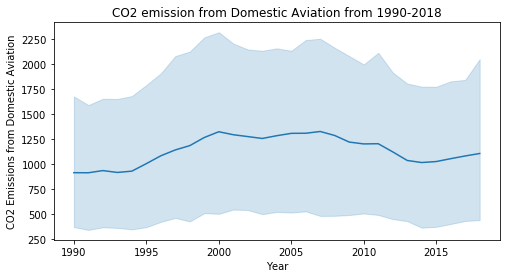

In [54]:
%matplotlib inline
from pylab import rcParams
rcParams['figure.figsize'] = 8, 4

fig = plt.figure()

ax = sns.lineplot(x = "Year", y = "Domestic_Aviation", data = data_Transport_Model)

ax.set(xlabel = 'Year', ylabel = 'CO2 Emissions from Domestic Aviation', title = 'CO2 emission from Domestic Aviation from 1990-2018')

fig.savefig("Domestic with Time for All countries.pdf")



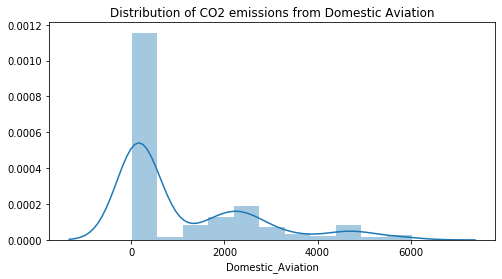

In [55]:
#Distribution of Domestic Aviation with time
fig = plt.figure()
ax = sns.distplot(data_Transport_Model["Domestic_Aviation"])
ax.set(title = 'Distribution of CO2 emissions from Domestic Aviation')
fig.savefig("Domestic Aviation Distribution.pdf")

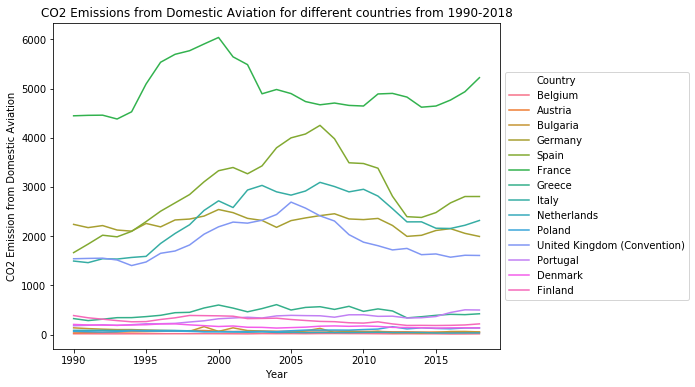

In [96]:
# Domestic Aviation with time for different countries
%matplotlib inline
from pylab import rcParams
rcParams['figure.figsize'] = 10, 6

fig = plt.figure()
ax = sns.lineplot(x = 'Year', y = 'Domestic_Aviation', hue='Country', data = data_Transport_Model)
ax.set(xlabel = 'Year', ylabel = 'CO2 Emission from Domestic Aviation', title = 'CO2 Emissions from Domestic Aviation for different countries from 1990-2018')
box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))

fig.savefig("Domestic Aviation with Time for All countries.pdf")

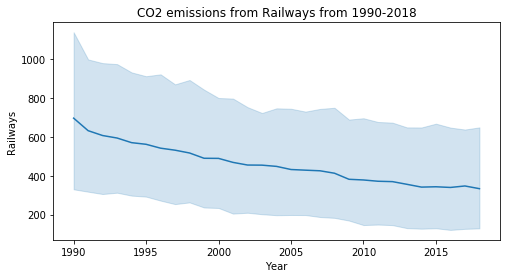

In [63]:
#Road Transportation change with time
%matplotlib inline
from pylab import rcParams
rcParams['figure.figsize'] = 8, 4

fig = plt.figure()

ax = sns.lineplot(x = "Year", y = "Railways", data = data_Transport_Model)
ax.set(title = 'CO2 emissions from Railways from 1990-2018')
fig.savefig("Railways with time.pdf")

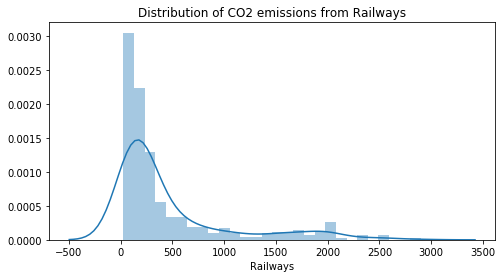

In [61]:
%matplotlib inline
from pylab import rcParams
rcParams['figure.figsize'] = 8, 4

fig = plt.figure()

ax = sns.distplot(data_Transport_Model["Railways"])

ax.set(title = 'Distribution of CO2 emissions from Railways')

fig.savefig("Railways Distribution.pdf")

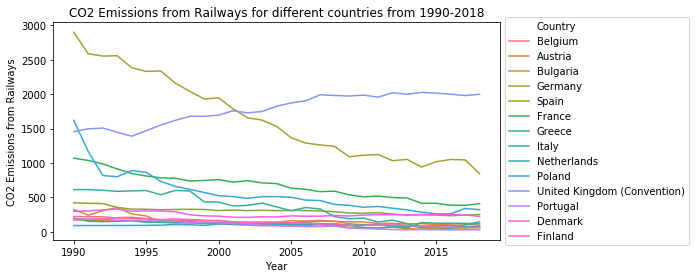

In [95]:
%matplotlib inline
from pylab import rcParams
rcParams['figure.figsize'] = 10, 4

fig = plt.figure()
ax = sns.lineplot(x = 'Year', y = 'Railways', hue='Country', data = data_Transport_Model)

ax.set(xlabel = "Year", ylabel = 'CO2 Emissions from Railways', title = 'CO2 Emissions from Railways for different countries from 1990-2018')

box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
fig.savefig("Railways with Time for All countries.pdf")

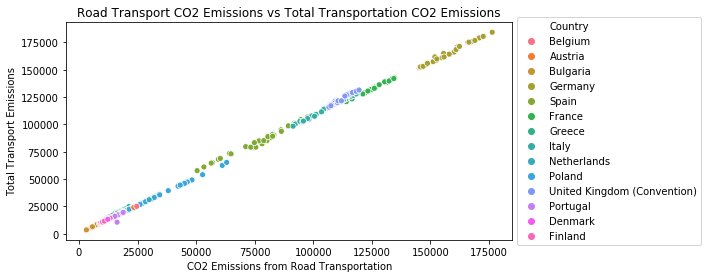

In [92]:
# Compare Road Transportation of different countries
%matplotlib inline
from pylab import rcParams
rcParams['figure.figsize'] = 10, 4

fig = plt.figure()
ax= sns.scatterplot(x = 'Road_Transportation', y = 'Transport_Emissions', hue = 'Country', data = data_Transport_Model)

ax.set(xlabel = 'CO2 Emissions from Road Transportation', ylabel = 'Total Transport Emissions', title = 'Road Transport CO2 Emissions vs Total Transportation CO2 Emissions')

box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
fig.savefig("Road_Transportation vs Transport Emissions.pdf")

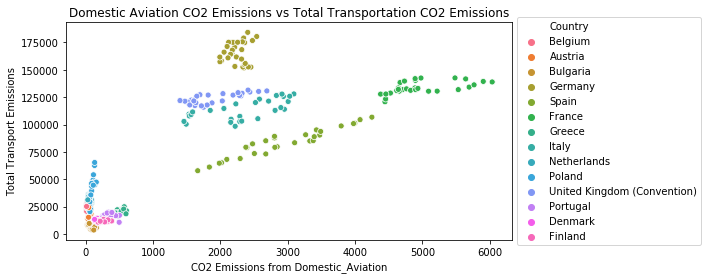

In [93]:
%matplotlib inline
from pylab import rcParams
rcParams['figure.figsize'] = 10, 4


fig = plt.figure()
ax = sns.scatterplot(x = 'Domestic_Aviation', y = 'Transport_Emissions', hue = 'Country', data = data_Transport_Model)
ax.set(xlabel = 'CO2 Emissions from Domestic_Aviation', ylabel = 'Total Transport Emissions', title = 'Domestic Aviation CO2 Emissions vs Total Transportation CO2 Emissions')

box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
fig.savefig("Domestic Aviation vs Transport Emissions.pdf")







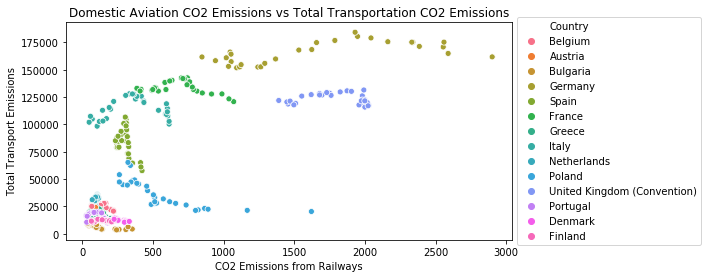

In [94]:
%matplotlib inline
from pylab import rcParams
rcParams['figure.figsize'] = 10, 4

fig = plt.figure()
ax=sns.scatterplot(x = 'Railways', y = 'Transport_Emissions', hue = 'Country', data = data_Transport_Model)

ax.set(xlabel='CO2 Emissions from Railways', ylabel = 'Total Transport Emissions', title = 'Domestic Aviation CO2 Emissions vs Total Transportation CO2 Emissions')

box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
fig.savefig("Railways vs Transport Emissions.pdf")